In [1]:
import pathlib
import string
import os
import sys

from collections import defaultdict

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pyloess is used for smoothing. It can be found on [github](https://github.com/joaofig/pyloess)

In [2]:
sys.path.append(os.path.abspath('../others/pyloess/'))
from pyloess.Loess import Loess

# Import data

### Death data 20th century

In [3]:
project_path = pathlib.Path.cwd()
dataset_path = project_path / 'Datasets'
figure_path = project_path / 'Figures'

metadata = []
description = []
data = {}
other = {}
datset_path_20th = dataset_path / '20thcenturymortality'
for f in datset_path_20th.glob('*'):
    if f.suffix in ['.xls', '.xlsx']:
        icd_v = f.stem.split('_')[0].lower()
        print(f.stem)
        excel_data = pd.read_excel(f, sheet_name=None, dtype=str)
        for k, v in excel_data.items():
            if k == 'metadata':
                metadata.append(v)
            elif k == 'description':
                #Add the ICD version to the data
                v['ICD_V'] = icd_v
                v.rename(columns = {'CODE': 'icdcode', 'DESCRIPTION': 'description1', 'description': 'description1'}, inplace=True)

                v.icdcode = v.icdcode.str.strip('*')
                description.append(v)
            elif 'icd' in k.lower():
                icd_col = v.columns[0]
                v['ICD_V'] = icd_v
                v.rename(columns = {'yr':'year', 'sex':'gender', 'ndths':'numdeaths', icd_col:'icdcode'}, inplace=True)
                v.icdcode = v.icdcode.str.strip('*')
                data[k.lower()] = v.astype({'year':int, 'gender':int, 'numdeaths':int, 'age':str, 'icdcode':str, 'ICD_V':str})
                #print(data[k].dtypes)
            else:
                #print(f.parent.stem, k)
                other[f'{f.parent.stem}_{k}'] = v
                        
description = pd.concat(description)#.set_index(['ICD_V', 'icdcode'])

icd1
icd2
icd3
icd4
icd5
icd6
icd7


C:\Users\domhu\Anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


icd8
icd9_a
icd9_b
icd9_c


In [4]:
def get_category(x):
    if any(word in x.description for word in ['fever']):
        return 'infectious'
    elif x.description == 'Unknown':
        return 'error'
    else:
        return ''
    


In [5]:
def get_description(x):
    try:
        result = ICD_key[ICD_key.icdcode == x]['description1'].values[0]
        return result

    except IndexError:
        print(f'{icd} contains unknown code: {x}')
        return 'Unknown'

data['icd1'].icdcode = data['icd1'].icdcode.str.lstrip('0')
for icd, dat in data.items():
    ICD_id = f"icd{icd.split('_')[0][-1]}"
    ICD_key = description[description.ICD_V == ICD_id]
    print(icd, ICD_id)
    dat['description'] = dat.icdcode.apply(get_description)
    data[icd] = dat.astype({'year':int, 'gender':int, 'numdeaths':int, 'age':str, 'icdcode':str, 'ICD_V':str})
print("done")

icd1 icd1
icd2_1 icd2
icd2_2 icd2
icd3_1 icd3
icd3_2 icd3
icd4_1 icd4
icd4_2 icd4
icd5_1 icd5
icd5_2 icd5
icd6_1 icd6
icd6_2 icd6
icd7_1 icd7
icd7_2 icd7
icd7_3 icd7
icd8_1 icd8
icd8_2 icd8
icd8_3 icd8
icd9_1 icd9
icd9_2 icd9
icd9_3 icd9
icd9_4 icd9
icd9_5 icd9
icd9_5 contains unknown code: 5159
icd9_5 contains unknown code: 5894
icd9_5 contains unknown code: 9522
icd9_6 icd9
icd9_6 contains unknown code: 1635
icd9_6 contains unknown code: 1652
icd9_6 contains unknown code: 4856
icd9_6 contains unknown code: 8266
icd9_6 contains unknown code: 8267
icd9_6 contains unknown code: 8959
icd9_6 contains unknown code: 9523
icd9_6 contains unknown code: 9825
icd9_6 contains unknown code: 7156
icd9_6 contains unknown code: 8266
icd9_6 contains unknown code: 8266
icd9_6 contains unknown code: 8266
icd9_6 contains unknown code: 8489
icd9_6 contains unknown code: 9012
icd9_6 contains unknown code: 9122
icd9_6 contains unknown code: 9849
icd9_7 icd9
icd9_7 contains unknown code: 9603
icd9_7 contain

In [6]:
keysets = [s.split('_') for s in data.keys()]
keylists = defaultdict(list)
for v in keysets:
    if len(v) > 1:
        keylists[v[0]].append(v[1])
    else:
        keylists[v[0]] = []
        
for icd, vl in keylists.items():
    dat = []
    for v in vl:
        dat.append(data.pop(f'{icd}_{v}'))
    if dat:
        data[icd] = pd.concat(dat)

### Death data 21st century

In [7]:
excel_data = pd.read_excel(dataset_path/'21stcenturymortality2019final.xls', sheet_name=None)
dats = []
for k in [j for j in excel_data.keys() if '20' in j]:
    dat = excel_data[k]
    dat.columns = dat.iloc[0].to_list()
    dat['ICD_V'] = 'icd10'
    dat.rename(columns = {'ICD-10': 'icdcode', 'YEAR': 'year', 'YR': 'year', 'SEX': 'gender', 'AGE':'age', 'ICD10': 'icdcode', 'Year': 'year', 'Sex': 'gender', 'Age':'age', 'NDTHS': 'numdeaths'}, inplace=True)
    dats.append(dat[['icdcode', 'year', 'gender', 'age', 'numdeaths', 'ICD_V']][1:])
    #print(dat.columns)
dats = pd.concat(dats)
data['icd10'] = dats

### Population data

In [8]:
excel_data = pd.read_excel(dataset_path/'ukpopulationestimates_1851-2014.xlsx', sheet_name=None)#, dtype=str)
totals = excel_data['UK Total Pop 1851-2014'].iloc[0:149]
totals.columns = totals.iloc[0].to_list()
totals = totals[['Year', 'Total Population']].iloc[34:].astype({'Year':int, 'Total Population':int})
totals.rename(columns={'Year':'year', 'Total Population': 'total_pop'}, inplace=True)

initial = excel_data['UK Quinary 1953-1970'].iloc[:20]
initial_male = excel_data['UK Quinary 1953-1970'].iloc[23:42]
initial_female = excel_data['UK Quinary 1953-1970'].iloc[45:64]
initial_columns = [s[4:] if 'Mid' in s else s for s in initial.iloc[0].to_list()]
initial.columns = initial_columns
initial_male.columns = initial_columns
initial_female.columns = initial_columns
initial.drop(['Code', 'Name'], inplace=True, axis=1)
initial_male.drop(['Code', 'Name'], inplace=True, axis=1)
initial_female.drop(['Code', 'Name'], inplace=True, axis=1)
initial = initial.iloc[1:].set_index('Age')
initial_male = initial_male.iloc[1:].set_index('Age')
initial_female = initial_female.iloc[1:].set_index('Age')
initial_corrected_columns = initial.columns[:12]
initial[initial_corrected_columns] = initial[initial_corrected_columns]*1000
initial_male[initial_corrected_columns] = initial_male[initial_corrected_columns]*1000
initial_female[initial_corrected_columns] = initial_female[initial_corrected_columns]*1000
initial = initial.astype(int)
initial_male = initial_male.astype(int)
initial_female = initial_female.astype(int)

totals['Male'] = totals.total_pop/ 2 
totals['Female'] = totals.total_pop/ 2
total_male = excel_data['UK Quinary 1953-1970'].iloc[23].values.copy()
total_male = total_male[3:]
total_male[:12] = total_male[:12]*1000
total_female = excel_data['UK Quinary 1953-1970'].iloc[45].values.copy()
total_female = total_female[3:]
total_female[:12] = total_female[:12]*1000 
totals.loc[(totals.year > 1952) & (totals.year < 1971), 'Male'] = total_male
totals.loc[(totals.year > 1952) & (totals.year < 1971), 'Female'] = total_female
total_male = excel_data['UK SYOA 1971-2014'].iloc[96].values.copy()
total_female = excel_data['UK SYOA 1971-2014'].iloc[191].values.copy()
total_male = total_male[3:]
total_female = total_female[3:]
totals.loc[totals.year > 1970, 'Male'] = total_male
totals.loc[totals.year > 1970, 'Female'] = total_female
totals = totals.astype({'Male':int, 'Female':int})

final = excel_data['UK SYOA 1971-2014'].iloc[:93]
final_male = excel_data['UK SYOA 1971-2014'].iloc[97:188]
final_female = excel_data['UK SYOA 1971-2014'].iloc[192:283]
final_columns = [s[4:] if 'Mid' in s else s for s in final.iloc[0].to_list()]
final.columns = final_columns
final_male.columns = final_columns
final_female.columns = final_columns
final.drop(['Code', 'Name'], inplace=True, axis=1)
final_male.drop(['Code', 'Name'], inplace=True, axis=1)
final_female.drop(['Code', 'Name'], inplace=True, axis=1)
final.Age = final.Age.astype(str)
final_male.Age = final_male.Age.astype(str)
final_female.Age = final_female.Age.astype(str)
final.Age[87] = '85+'
final_male.Age[182] = '85+'
final_female.Age[277] = '85+'
final = final.iloc[2:].set_index('Age').replace(':', '0').astype(int)
final_male = final_male.set_index('Age').replace(':', '0').astype(int)
final_female = final_female.set_index('Age').replace(':', '0').astype(int)
final.iloc[86] = final.iloc[86:].sum()
final_male.iloc[85] = final_male.iloc[85:].sum()
final_female.iloc[85] = final_female.iloc[85:].sum()
final = final.iloc[:86]
final_male = final_male.iloc[:86]
final_female = final_female.iloc[:86]

excel_data = pd.read_excel(dataset_path/'nomis_2021_01_15_011854.xlsx', sheet_name=None)
final_next = excel_data['United Kingdom Total']
final_next_male = excel_data['United Kingdom Male']
final_next_female = excel_data['United Kingdom Female']
final_next.columns = [str(s)[:4] for s in final_next.iloc[6].values]
final_next_male.columns = final_next.columns
final_next_female.columns = final_next.columns
total_next = pd.DataFrame(final_next.iloc[7,-5:]).reset_index()
total_next['Male'] = final_next_male.iloc[7,-5:].values
total_next['Female'] = final_next_female.iloc[7,-5:].values
total_next.columns = totals.columns
totals = totals.append(total_next).reset_index(drop=True).astype(int)
final_next = final_next.iloc[8:]
final_next_male = final_next_male.iloc[8:]
final_next_female = final_next_female.iloc[8:]
final_next.Age = [a[4:].strip(' ') for a in final_next.Age]
final_next_male.Age = [a[4:].strip(' ') for a in final_next_male.Age]
final_next_female.Age = [a[4:].strip(' ') for a in final_next_female.Age]
final_next = final_next.set_index('Age').astype(int)
final_next_male = final_next_male.set_index('Age').astype(int)
final_next_female = final_next_female.set_index('Age').astype(int)
span = [str(s) for s in range(2015, 2020)]
final = final.join(final_next[span])
final_male = final_male.join(final_next_male[span])
final_female = final_female.join(final_next_female[span])

C:\Users\domhu\Anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\domhu\Anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\domhu\Anaconda3\lib\site-packages\pandas\core\generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se

# Figure helper functions

In [9]:
def setup_ax(ax, xlabel, ylabel):
    ax.yaxis.set_tick_params(labelsize=10, colors="dimgrey")
    ax.xaxis.set_tick_params(labelsize=10, colors="dimgrey")
    ax.set_facecolor("0.97")
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')
    ax.set_ylabel(ylabel,
                  rotation=90, 
                  color="dimgrey", 
                  size=15,
                  labelpad=10,
                  verticalalignment='center',
                  horizontalalignment='center')
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_position('bottom')
    ax.set_xlabel(xlabel, color="dimgrey", size=15)
    ax.grid(color='w')
    ax.set_xticks(np.arange(1900, 2030, 10))
    ax.set_xlim(1900, 2020)

In [10]:
def setup_colorbar(fig, ax):
    cbar_ax = fig.add_axes([0.91, 0.125, 0.02, 0.75])
    cb = fig.colorbar(ax.collections[0], 
                      ax=ax, 
                      orientation='vertical', 
                      extend='both', 
                      cax=cbar_ax)
    cb.set_label('fit quality', 
                 labelpad=15, 
                 size=13, 
                 color="dimgrey", 
                 rotation=270)
    cb.ax.tick_params(labelsize=10, colors="grey")

# Basic analysis

## Population

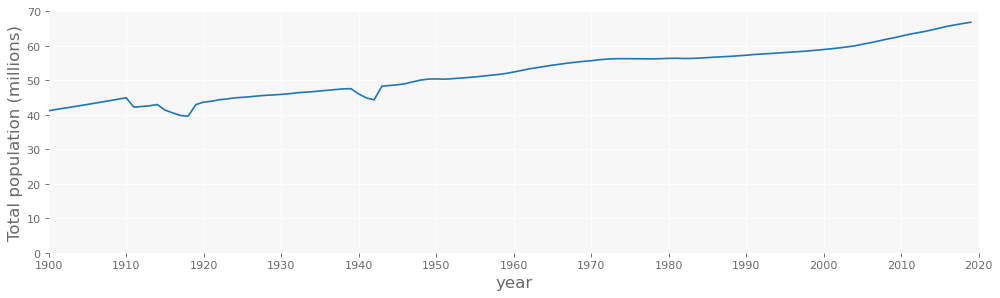

In [11]:
fig = plt.figure(figsize=(15, 4), dpi=80)
ax = fig.add_subplot(1,1,1)
ax.plot(totals.year, totals.total_pop.values/1000000)
ax.set_ylim(0, 70)
setup_ax(ax, 'year', 'Total population (millions)')

In [12]:
deaths = []
for k, icd in data.items():
    deaths.append(icd.groupby(['year']).numdeaths.sum())
deaths = pd.concat(deaths).reset_index()
deaths['proportion'] = deaths.apply(lambda x: x.numdeaths/totals.total_pop[totals.year==x.year].values[0], axis=1)
deaths['deaths per million'] = deaths.apply(lambda x: x.numdeaths/totals.total_pop[totals.year==x.year].values[0]*1000000, axis=1)

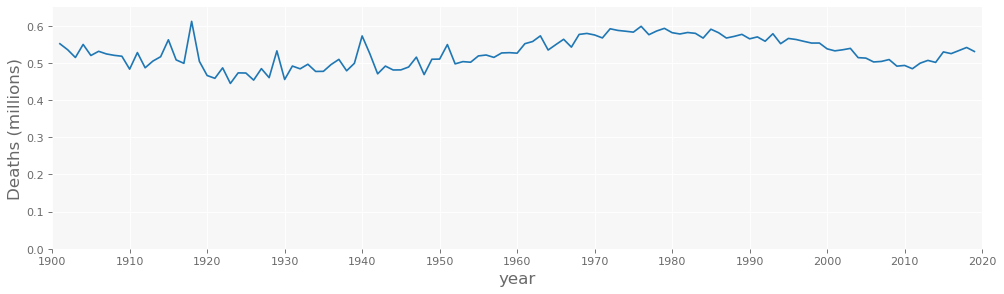

In [13]:
fig = plt.figure(figsize=(15, 4), dpi=80)
ax = fig.add_subplot(1,1,1)
ax.plot(deaths.year, deaths.numdeaths.values/1000000)
ax.set_ylim(0, 0.65)
setup_ax(ax, 'year', 'Deaths (millions)')

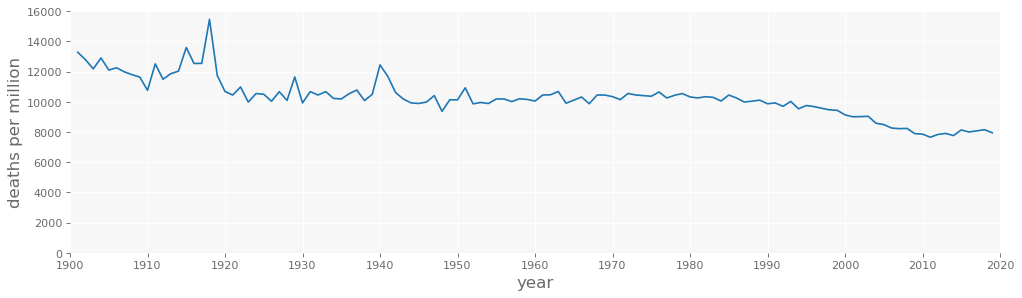

In [14]:
fig = plt.figure(figsize=(15, 4), dpi=80)
ax = fig.add_subplot(1,1,1)
deaths.plot('year', 'deaths per million', xlim=(1900, 2020), legend=False, ax=ax)
ax.set_ylim(0, 16000)
setup_ax(ax, 'year', 'deaths per million')
fig.savefig(figure_path/'deaths_per_million.png')

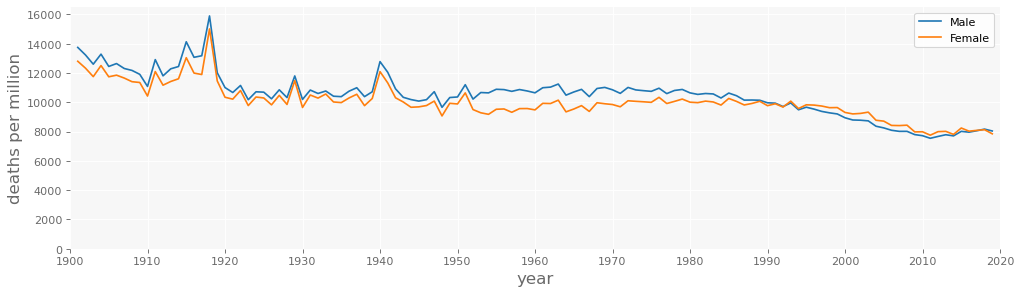

In [15]:
deaths_male = []
deaths_female = []
for k, icd in data.items():
    deaths_male.append(icd[icd.gender==1].groupby(['year']).numdeaths.sum())
    deaths_female.append(icd[icd.gender==2].groupby(['year']).numdeaths.sum())
deaths_male = pd.concat(deaths_male).reset_index()
deaths_female = pd.concat(deaths_female).reset_index()
deaths_male['proportion'] = deaths_male.apply(lambda x: x.numdeaths/totals['Male'][totals.year==x.year].values[0], axis=1)
deaths_male['deaths per million'] = deaths_male.apply(lambda x: x.numdeaths/totals['Male'][totals.year==x.year].values[0]*1000000, axis=1)
deaths_female['proportion'] = deaths_female.apply(lambda x: x.numdeaths/totals['Female'][totals.year==x.year].values[0], axis=1)
deaths_female['deaths per million'] = deaths_female.apply(lambda x: x.numdeaths/totals['Female'][totals.year==x.year].values[0]*1000000, axis=1)
fig = plt.figure(figsize=(15, 4), dpi=80)
ax = fig.add_subplot(1,1,1)
deaths_male.plot('year', 'deaths per million', xlim=(1900, 2020), label='Male', ax=ax)#, color='b')
deaths_female.plot('year', 'deaths per million', xlim=(1900, 2020), label='Female', ax=ax)
ax.set_ylim(0, 16500)
setup_ax(ax, 'year', 'deaths per million')
fig.savefig(figure_path/'deaths_per_million_gender.png')

## Smoothed equivalents

In [16]:
loess = Loess(deaths.year.values, deaths['deaths per million'].values)
step = 0.25
year_s = np.arange(deaths.year.min(), deaths.year.max() + step, step)
deaths_s = np.empty_like(year_s)
for i in range(len(year_s)):
    deaths_s[i] = loess.estimate(year_s[i], window=10)

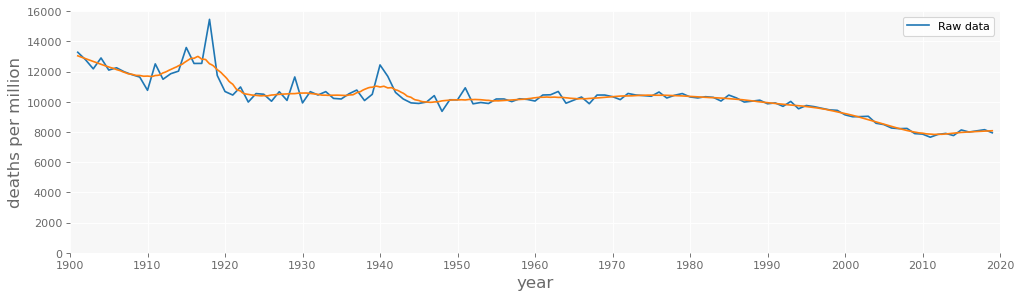

In [17]:
fig = plt.figure(figsize=(15, 4), dpi=80)
ax = fig.add_subplot(1,1,1)
deaths.plot('year', 'deaths per million', xlim=(1900, 2020), label='Raw data', ax=ax)
ax.plot(year_s, deaths_s, label='2.5 year averaged')
ax.set_ylim(0, 16000)
setup_ax(ax, 'year', 'deaths per million')
fig.savefig(figure_path/'deaths_per_million_smoothed.png')

## Residuals

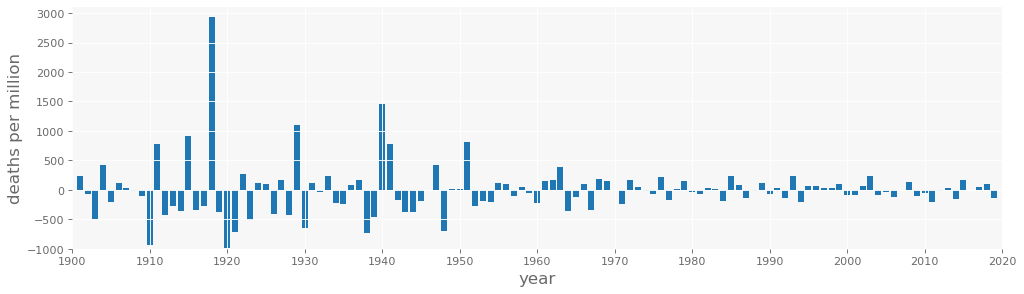

In [18]:
difference = deaths['deaths per million'].values - deaths_s[0::int(1/step)]
fig = plt.figure(figsize=(15, 4), dpi=80)
ax = fig.add_subplot(1,1,1)
ax.bar(deaths.year, difference)
ax.set_ylim(-1000, 3100)
setup_ax(ax, 'year', 'residual deaths per million')
fig.savefig(figure_path/'deaths_per_million_residuals.png')

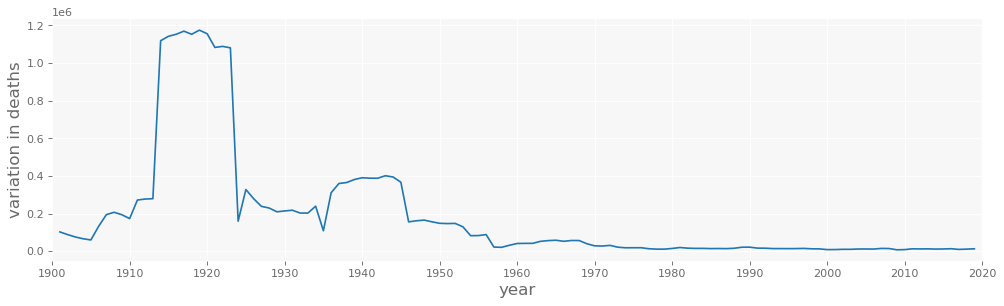

In [38]:
window = 5
VarValues = np.empty_like(difference)
for count in range(0, len(difference)):
    window_min = count - window
    window_max = count + window
    if window_min < 0:
        window_min = 0
    VarValues[count] = np.var(difference[window_min: window_max])

fig = plt.figure(figsize=(15, 4), dpi=80)
ax = fig.add_subplot(1,1,1)
ax.plot(deaths.year.values, VarValues)
setup_ax(ax, 'year', 'variation in deaths')
fig.savefig(figure_path/'deaths_per_million_residuals_variation.png')

# Death breakdowns

In [20]:
description[description.ICD_V=='icd2']

,icdcode,description1,ICD_V,Unnamed: 2,description2
0,1,Enteric fever,icd2,NaN,NaN
1,2,Typhus,icd2,NaN,NaN
2,3A,Relapsing fever,icd2,NaN,NaN
3,3B,Mediterranean fever,icd2,NaN,NaN
4,4,Malaria,icd2,NaN,NaN
...,...,...,...,...,...
312,189B,"Atrophy, debility, marasmus (>1 & <70)",icd2,NaN,NaN
313,189C,Teething,icd2,NaN,NaN
314,189D,Pyrexia,icd2,NaN,NaN
315,189E,Other ill-defined deaths,icd2,NaN,NaN


In [20]:
for k in data.keys():
    print(k)
    data_ageless= data[k].groupby(['icdcode', 'year']).numdeaths.sum()
    print(set([k[0] for k in data_ageless[data_ageless > 10000].index]))#.sort_values(ascending=False).iloc[:20])

icd1
{'1670', '1050', '460', '380', '220', '470', '1060', '210', '1180', '390', '700', '1440', '890', '60', '120', '1660', '130', '990', '1070', '680', '760'}
icd2
{'91', '151A', '40', '28B', '79A', '151B', '154B', '28A', '81B', '79C', '120A', '89&90B', '92A', '104A', '92B', '10', '64E', '6'}
icd3
{'74a(1)', '11a(1)', '90(9)', '101a', '100', '45', '91b(1)', '113,114(3)', '99c,99d', '164(2)', '99a', '90(4)', '99b', '31', '90(2)', '91b(2)', '161(1)', '49', '44', '90(7)', '129'}
icd4
{'97(3)', '11a(1)', '162b', '82a(1)', '94', '186', '159', '107', '93c', '92(2)', '46', '106c', '93b(3)', '92(5)', '93b(2)', '108', '23', '131'}
icd5
{'93d', '47b', '94a', '162c', '106b', '107(2)', '93c(1)', '97', '46b', '13b', '46c', '83a', '106c', '93c(3)', '197', '106a', '83bc'}
icd6
{'1620', '4221', '4910', '4222', '3320', '1530', '4430', '5021', '1630', '5020', '4500', '1510', '3310', '4201', '0020'}
icd7
{'3310', '4221', '4910', '4222', '3320', '4430', '5021', '1700', '5020', '4500', '1510', '1621', '420

# Age corrections

In [ ]:
ageset = set()
for k in data.keys():
    a = data[k].age.unique()
    ageset = ageset.union(a)
ages = list(ageset)
ages.sort()
print(ages)